In [48]:
import os
import numpy as np
from skimage.io import imshow,imread
import cv2 as cv
from torch.utils.data import DataLoader
import torch
from torch.optim import Adam
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
!ls

dataset.py     LICENSE	model_manager.py  __pycache__	  util.py
experiment.sh  logs	models		  README.md
images	       main.py	prediction	  Untitled.ipynb


In [26]:
import dataset
import models.ae_01 as m1
import models.vae_01 as v1
from util import vae_loss

In [5]:
!ls

dataset.py     LICENSE	model_manager.py  __pycache__	  util.py
experiment.sh  logs	models		  README.md
images	       main.py	prediction	  Untitled.ipynb


In [6]:
!ls ../../mnist/mnistasjpg/trainingSet/trainingSet/

0  1  2  3  4  5  6  7	8  9


In [7]:
ts = '../../mnist/mnistasjpg/trainingSet/trainingSet/'

In [8]:
dirs = [os.path.join(ts,dir_) for dir_ in os.listdir(ts)]
dirs.sort()

In [9]:
fls = [os.path.join(dir_,fl) for dir_ in dirs for fl in os.listdir(dir_)]

In [10]:
len(fls)

42000

In [11]:
a = np.arange(len(fls),dtype=np.int)
np.random.shuffle(a)

In [12]:
fls = np.array(fls)

In [13]:
cutoff = int(0.7*len(fls))
cutoff

29399

In [14]:
len(fls)

42000

In [15]:
fls_trn = fls[a[:cutoff]]
fls_tst = fls[a[cutoff:]]

In [16]:
len(fls_trn)+len(fls_tst)

42000

In [17]:
trn_ds = dataset.Dataset_ravi(fls_trn)

In [23]:
tst_ds = dataset.Dataset_ravi(fls_tst)

In [24]:
train_loader = DataLoader(trn_ds, batch_size= 64, shuffle= True)
valid_loader = DataLoader(tst_ds, batch_size= 64, shuffle= False)

In [28]:
m = v1.Model_ravi()

In [29]:
device = torch.device("cuda")
m.to(device);

In [30]:
epoch_num = 1

optimizer = Adam(m.parameters(),lr=0.001)
sigma = 0.5

In [173]:
for epoch in tqdm(range(300)):
    m.train()
            
    for batch_id, imgs in enumerate(train_loader):
        imgs = imgs.to(device)
    
        out, mu, logvar = m(imgs)
        #print(out.shape,imgs.shape)
        loss = vae_loss(sigma, out, imgs, mu, logvar)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [304]:
i = tst_ds[10500]

In [305]:
i = i.to(device)

In [306]:
i1,u,v = m(i.view(1,1,28,28))

In [307]:
inum = i.cpu().numpy()

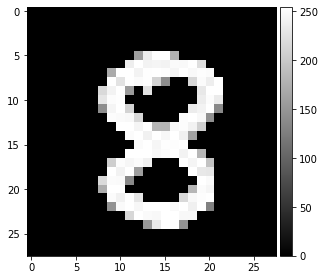

In [308]:
imshow(inum.squeeze(),cmap='gray')

In [309]:
inump = i1.detach().cpu().numpy()

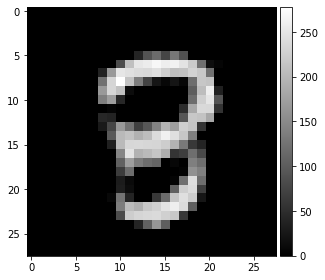

In [310]:
imshow(inump.squeeze(),cmap='gray')